## Installing and importing libraries

In [ ]:
import numpy as np
import pandas as pd
!pip install -q transformers sentencepiece
from transformers import pipeline
from google.colab import files
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.3 MB/s eta 0:00:00


## Importing and cleaning reviews

In [ ]:
disneyplus = pd.read_csv('DisneyPlus_Google_Play.csv')

In [ ]:
disneyplus

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,75affb77-43d6-4ada-9d8d-576d75a89295,William Graham,https://play-lh.googleusercontent.com/a/AGNmyx...,absolutely awesome 👌,5,0,2.18.1-rc1,2023-04-05 11:13:22,NaN,NaN
1,1,de8a389b-d296-484b-8049-555b31436e70,Nelson Lam,https://play-lh.googleusercontent.com/a/AGNmyx...,I wonder the software of Disney plus have an i...,1,0,NaN,2023-04-05 11:10:55,NaN,NaN
2,2,f0b0ef9c-5db3-44d5-9b70-2984685a55a2,Denuwan Saranga,https://play-lh.googleusercontent.com/a-/ACB-R...,Can you give 1 month premium free❤️Please,5,0,NaN,2023-04-05 10:57:42,NaN,NaN
3,3,f9b16c2c-6bf1-4de2-acf9-25db53feccf2,Gratien ABANJYE,https://play-lh.googleusercontent.com/a-/ACB-R...,Great,5,0,NaN,2023-04-05 10:40:22,NaN,NaN
4,4,9e483f7c-c572-4e46-a47a-f579a6d230ee,Jason Parker,https://play-lh.googleusercontent.com/a-/ACB-R...,mandalorian!,5,0,2.18.1-rc1,2023-04-05 10:22:27,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
209181,209181,99bd5530-071c-46ae-8d65-f396a788805e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love Disney! Awesome app!,5,6,1.0.0,2019-09-12 06:17:19,NaN,NaN
209182,209182,866c928f-7d71-4b48-bb57-08dd93d3364e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Crashes once when switching over to kids profi...,1,5,1.0.0,2019-09-12 06:08:19,Hello Rocco. Thanks for the feedback. Can you ...,2019-09-21 17:32:41
209183,209183,1c1eaa4c-c4c3-4742-8c77-e8af41458549,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love Disney so I'm very happy with this (ver...,5,3,1.0.0,2019-09-12 05:31:04,NaN,NaN
209184,209184,c4d3a462-ac13-4fef-b21c-12e86223e1e5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's the best app streaming,5,1,1.0.0,2019-09-12 04:52:26,NaN,NaN


In [ ]:
disneyplus.dropna(axis = 0, how = 'any', inplace = True, subset = 'content')   # we need to remove nan reviews to conduct a trustable topic modeling

## Creation of a subset with the most recent 2000 reviews (due to technical limitations)

In [ ]:
disneyplus_subset = disneyplus[:2000]

In [ ]:
disneyplus_subset

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,75affb77-43d6-4ada-9d8d-576d75a89295,William Graham,https://play-lh.googleusercontent.com/a/AGNmyx...,absolutely awesome 👌,5,0,2.18.1-rc1,2023-04-05 11:13:22,NaN,NaN
1,1,de8a389b-d296-484b-8049-555b31436e70,Nelson Lam,https://play-lh.googleusercontent.com/a/AGNmyx...,I wonder the software of Disney plus have an i...,1,0,NaN,2023-04-05 11:10:55,NaN,NaN
2,2,f0b0ef9c-5db3-44d5-9b70-2984685a55a2,Denuwan Saranga,https://play-lh.googleusercontent.com/a-/ACB-R...,Can you give 1 month premium free❤️Please,5,0,NaN,2023-04-05 10:57:42,NaN,NaN
3,3,f9b16c2c-6bf1-4de2-acf9-25db53feccf2,Gratien ABANJYE,https://play-lh.googleusercontent.com/a-/ACB-R...,Great,5,0,NaN,2023-04-05 10:40:22,NaN,NaN
4,4,9e483f7c-c572-4e46-a47a-f579a6d230ee,Jason Parker,https://play-lh.googleusercontent.com/a-/ACB-R...,mandalorian!,5,0,2.18.1-rc1,2023-04-05 10:22:27,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,47d95904-13a2-4da7-aef0-a33fff924d01,Richard Wood,https://play-lh.googleusercontent.com/a-/ACB-R...,"I'm never able to download to watch later, no ...",1,0,2.17.2-rc2,2023-03-11 18:45:00,NaN,NaN
1996,1996,75c6629f-de4c-4812-8962-f980508fe9b5,Spencer Lybbert,https://play-lh.googleusercontent.com/a/AGNmyx...,"no way to remove titles from ""continue watchin...",1,33,2.17.2-rc2,2023-03-11 18:37:47,NaN,NaN
1997,1997,0ef85783-ffc1-4726-9ec9-769c795b1add,Gordon Brown,https://play-lh.googleusercontent.com/a-/ACB-R...,Surround sound modes do not work with current ...,1,0,2.17.2-rc2,2023-03-11 18:27:49,NaN,NaN
1998,1998,78e085a8-c110-4209-884c-4c4ad28bea49,henry rodwell,https://play-lh.googleusercontent.com/a/AGNmyx...,buffering,2,0,2.17.2-rc2,2023-03-11 18:19:30,NaN,NaN


## Setting the classification model

In [ ]:
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


## Running the classification model

In [ ]:
reviews = disneyplus_subset.content
classifier_outputs = []
topics = []
candidate_labels = ['price', 'technical', 'original content', 'usage', 'variety', 'audio', 'security', 'resolution', 'customization', 'generic']

for r in reviews:
  classifier_outputs.append(classifier(r, candidate_labels=candidate_labels))

  topics.append(classifier_outputs[-1]['labels'][0])

In [ ]:
disneyplus_subset['classifier output'] = classifier_outputs
disneyplus_subset['topic'] = topics

<ipython-input-9-1f126a2587fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disneyplus_subset['classifier output'] = classifier_outputs
<ipython-input-9-1f126a2587fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disneyplus_subset['topic'] = topics


## Saving and exporting the results

In [ ]:
disneyplus_subset.to_csv('DisneyPlus_topic_modeling.csv')
files.download('DisneyPlus_topic_modeling.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
disneyplus_topics = pd.read_csv('DisneyPlus_topic_modeling.csv')

In [ ]:
disneyplus_topics

,Unnamed: 0.1,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,classifier output,topic
0,0,0,75affb77-43d6-4ada-9d8d-576d75a89295,William Graham,https://play-lh.googleusercontent.com/a/AGNmyx...,absolutely awesome 👌,5,0,2.18.1-rc1,2023-04-05 11:13:22,NaN,NaN,"{'sequence': 'absolutely awesome 👌', 'labels':...",original content
1,1,1,de8a389b-d296-484b-8049-555b31436e70,Nelson Lam,https://play-lh.googleusercontent.com/a/AGNmyx...,I wonder the software of Disney plus have an i...,1,0,NaN,2023-04-05 11:10:55,NaN,NaN,{'sequence': 'I wonder the software of Disney ...,audio
2,2,2,f0b0ef9c-5db3-44d5-9b70-2984685a55a2,Denuwan Saranga,https://play-lh.googleusercontent.com/a-/ACB-R...,Can you give 1 month premium free❤️Please,5,0,NaN,2023-04-05 10:57:42,NaN,NaN,{'sequence': 'Can you give 1 month premium fre...,price
3,3,3,f9b16c2c-6bf1-4de2-acf9-25db53feccf2,Gratien ABANJYE,https://play-lh.googleusercontent.com/a-/ACB-R...,Great,5,0,NaN,2023-04-05 10:40:22,NaN,NaN,"{'sequence': 'Great', 'labels': ['original con...",original content
4,4,4,9e483f7c-c572-4e46-a47a-f579a6d230ee,Jason Parker,https://play-lh.googleusercontent.com/a-/ACB-R...,mandalorian!,5,0,2.18.1-rc1,2023-04-05 10:22:27,NaN,NaN,"{'sequence': 'mandalorian!', 'labels': ['varie...",variety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1995,47d95904-13a2-4da7-aef0-a33fff924d01,Richard Wood,https://play-lh.googleusercontent.com/a-/ACB-R...,"I'm never able to download to watch later, no ...",1,0,2.17.2-rc2,2023-03-11 18:45:00,NaN,NaN,"{'sequence': ""I'm never able to download to wa...",usage
1996,1996,1996,75c6629f-de4c-4812-8962-f980508fe9b5,Spencer Lybbert,https://play-lh.googleusercontent.com/a/AGNmyx...,"no way to remove titles from ""continue watchin...",1,33,2.17.2-rc2,2023-03-11 18:37:47,NaN,NaN,"{'sequence': 'no way to remove titles from ""co...",usage
1997,1997,1997,0ef85783-ffc1-4726-9ec9-769c795b1add,Gordon Brown,https://play-lh.googleusercontent.com/a-/ACB-R...,Surround sound modes do not work with current ...,1,0,2.17.2-rc2,2023-03-11 18:27:49,NaN,NaN,{'sequence': 'Surround sound modes do not work...,audio
1998,1998,1998,78e085a8-c110-4209-884c-4c4ad28bea49,henry rodwell,https://play-lh.googleusercontent.com/a/AGNmyx...,buffering,2,0,2.17.2-rc2,2023-03-11 18:19:30,NaN,NaN,"{'sequence': 'buffering', 'labels': ['technica...",technical


## Plotting the counter of the topics

In [ ]:
topic_counts = disneyplus_topics['topic'].value_counts().sort_values(ascending=True)
print(topic_counts)

resolution           33
security             56
customization        63
generic              64
price                81
audio                85
original content    237
technical           244
variety             374
usage               763
Name: topic, dtype: int64


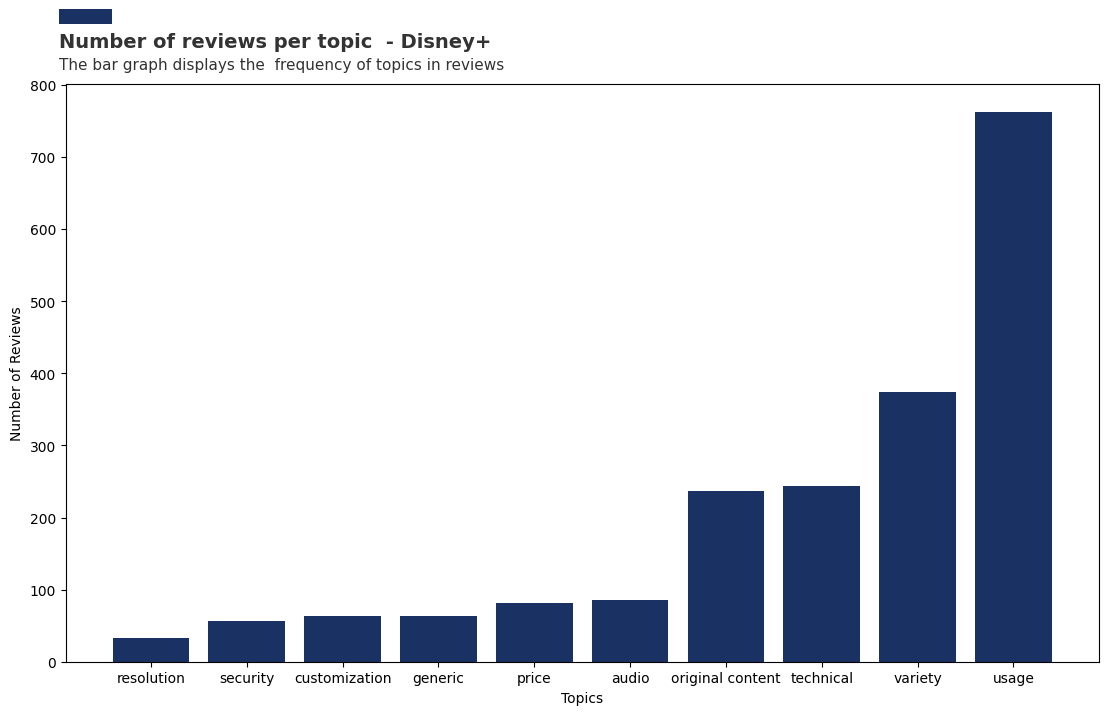

In [ ]:
import matplotlib.pyplot as plt

# create a list of topics and their respective counts
topics = topic_counts.index.tolist()
counts = topic_counts.tolist()

fig, ax = plt.subplots(figsize=(13.33, 7.5), dpi=100)

# plot the bar graph
plt.bar(topics, counts, color='#1A3263')

# set labels for x and y axes
plt.xlabel('Topics')
plt.ylabel('Number of Reviews')



ax.text(x=0.12, y=0.93, s='Number of reviews per topic  - Disney+', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=0.90, s='The bar graph displays the  frequency of topics in reviews ', transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor= '#1A3263', transform=fig.transFigure, clip_on=False, linewidth = 0))

# display the graph
plt.show()



## Labeling reviews basing on the score

In [ ]:
disneyplus_topics['label'] = 'neutral'

high_mask = disneyplus_topics['score'] >= 4
disneyplus_topics['label'].loc[high_mask] = 'positive'

low_mask = disneyplus_topics['score'] <= 2
disneyplus_topics['label'].loc[low_mask] = 'negative'

<ipython-input-4-860949b7efac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disneyplus_topics['label'].loc[high_mask] = 'positive'
<ipython-input-4-860949b7efac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disneyplus_topics['label'].loc[low_mask] = 'negative'


In [ ]:
disneyplus_topics

,Unnamed: 0.1,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,classifier output,topic,label
0,0,0,75affb77-43d6-4ada-9d8d-576d75a89295,William Graham,https://play-lh.googleusercontent.com/a/AGNmyx...,absolutely awesome 👌,5,0,2.18.1-rc1,2023-04-05 11:13:22,NaN,NaN,"{'sequence': 'absolutely awesome 👌', 'labels':...",original content,positive
1,1,1,de8a389b-d296-484b-8049-555b31436e70,Nelson Lam,https://play-lh.googleusercontent.com/a/AGNmyx...,I wonder the software of Disney plus have an i...,1,0,NaN,2023-04-05 11:10:55,NaN,NaN,{'sequence': 'I wonder the software of Disney ...,audio,negative
2,2,2,f0b0ef9c-5db3-44d5-9b70-2984685a55a2,Denuwan Saranga,https://play-lh.googleusercontent.com/a-/ACB-R...,Can you give 1 month premium free❤️Please,5,0,NaN,2023-04-05 10:57:42,NaN,NaN,{'sequence': 'Can you give 1 month premium fre...,price,positive
3,3,3,f9b16c2c-6bf1-4de2-acf9-25db53feccf2,Gratien ABANJYE,https://play-lh.googleusercontent.com/a-/ACB-R...,Great,5,0,NaN,2023-04-05 10:40:22,NaN,NaN,"{'sequence': 'Great', 'labels': ['original con...",original content,positive
4,4,4,9e483f7c-c572-4e46-a47a-f579a6d230ee,Jason Parker,https://play-lh.googleusercontent.com/a-/ACB-R...,mandalorian!,5,0,2.18.1-rc1,2023-04-05 10:22:27,NaN,NaN,"{'sequence': 'mandalorian!', 'labels': ['varie...",variety,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1995,47d95904-13a2-4da7-aef0-a33fff924d01,Richard Wood,https://play-lh.googleusercontent.com/a-/ACB-R...,"I'm never able to download to watch later, no ...",1,0,2.17.2-rc2,2023-03-11 18:45:00,NaN,NaN,"{'sequence': ""I'm never able to download to wa...",usage,negative
1996,1996,1996,75c6629f-de4c-4812-8962-f980508fe9b5,Spencer Lybbert,https://play-lh.googleusercontent.com/a/AGNmyx...,"no way to remove titles from ""continue watchin...",1,33,2.17.2-rc2,2023-03-11 18:37:47,NaN,NaN,"{'sequence': 'no way to remove titles from ""co...",usage,negative
1997,1997,1997,0ef85783-ffc1-4726-9ec9-769c795b1add,Gordon Brown,https://play-lh.googleusercontent.com/a-/ACB-R...,Surround sound modes do not work with current ...,1,0,2.17.2-rc2,2023-03-11 18:27:49,NaN,NaN,{'sequence': 'Surround sound modes do not work...,audio,negative
1998,1998,1998,78e085a8-c110-4209-884c-4c4ad28bea49,henry rodwell,https://play-lh.googleusercontent.com/a/AGNmyx...,buffering,2,0,2.17.2-rc2,2023-03-11 18:19:30,NaN,NaN,"{'sequence': 'buffering', 'labels': ['technica...",technical,negative


## Plotting the average score for each topic


In [ ]:
aggregated_reviews2 = disneyplus_topics.groupby(['topic']).score.mean()

In [ ]:
aggregated_reviews2.index

Index(['security', 'technical', 'generic', 'usage', 'audio', 'price',
       'resolution', 'customization', 'original content', 'variety'],
      dtype='object', name='topic')

In [ ]:
aggregated_reviews2.index = ['security', 'technical', 'generic', 'usage', 'audio', 'price',
       'resolution', 'customiz.', 'original content', 'variety']

In [ ]:
aggregated_reviews2.sort_values(inplace = True)

In [ ]:
aggregated_reviews2

security            1.625000
technical           1.745902
generic             2.062500
usage               2.250328
audio               2.835294
price               2.851852
resolution          2.909091
customiz.           3.539683
original content    4.476793
variety             4.598930
Name: score, dtype: float64

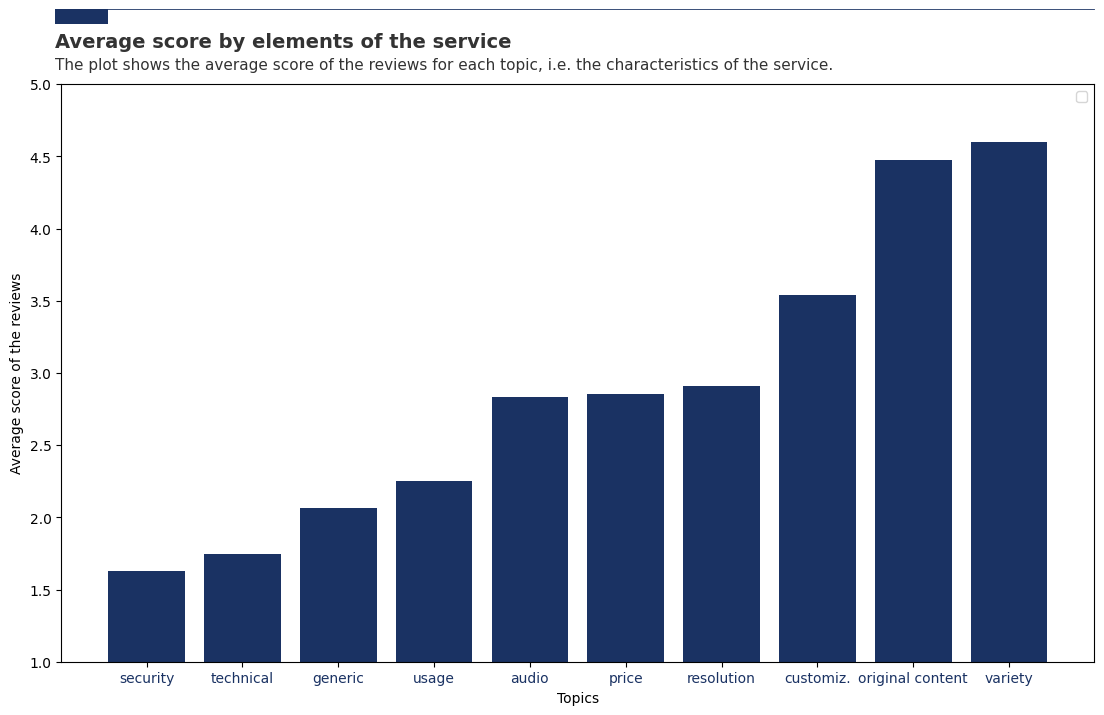

In [ ]:
# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi=100)

# create the line graph
y_pos = np.arange(len(aggregated_reviews2.index))
plt.bar(y_pos, aggregated_reviews2.values, color='#1A3263')
plt.xticks(y_pos, aggregated_reviews2.index, color='#1A3263')
# Create the grid 
ax.set_ylim(1, 5)
# set the title, legend, and axis labels
plt.xlabel('Topics')
plt.ylabel('Average score of the reviews')
plt.legend()
ax.text(x=0.12, y=0.93, s='Average score by elements of the service', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=0.90, s='The plot shows the average score of the reviews for each topic, i.e. the characteristics of the service.', transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#1A3263', transform=fig.transFigure, clip_on=False, linewidth = 0))
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#1A3263', linewidth=.6)

# display the graph
plt.show()